In [1]:
import os
from PIL import Image
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, ConfusionMatrixDisplay

In [2]:
indoor_train_path = 'museum_train/indoor/'
outdoor_train_path = 'museum_train/outdoor/'

In [3]:
def load_images_from_folder(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize((224, 224))  # Resize images to a common size
        img = img.convert('L')  # Convert to grayscale (optional)
        img = np.array(img).flatten()  # Flatten the image to 1D array
        img = img/255
        images.append(img)
        labels.append(label)
    return images, labels

In [4]:
indoor_train_images, indoor_train_labels = load_images_from_folder(indoor_train_path, label=0)
outdoor_train_images, outdoor_train_labels = load_images_from_folder(outdoor_train_path, label=1)

In [5]:
X = np.array(indoor_train_images + outdoor_train_images)
y = np.array(indoor_train_labels + outdoor_train_labels)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = GradientBoostingClassifier(learning_rate=0.01,n_estimators=10,verbose=1,random_state=42)
model.fit(X_train,y_train)

      Iter       Train Loss   Remaining Time 
         1           1.3827           14.49m
         2           1.3792           13.23m
         3           1.3758           12.02m
         4           1.3725           10.63m
         5           1.3692            8.95m
         6           1.3660            7.27m
         7           1.3627            5.42m
         8           1.3597            3.61m
         9           1.3565            1.81m
        10           1.3535            0.00s


GradientBoostingClassifier(learning_rate=0.01, n_estimators=10, random_state=42,
                           verbose=1)

Accuracy: 66.60%
Precision: 63.20%
Recall: 77.53%
F1 Score: 69.64%


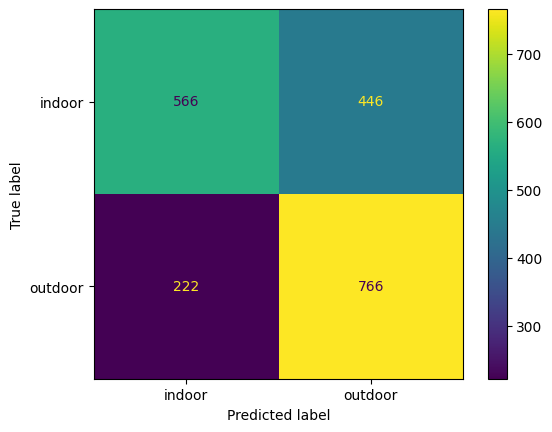

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1_score = f1_score(y_test,y_pred)

print(f'Accuracy: {accuracy * 100:.2f}%')
print(f'Precision: {precision * 100:.2f}%')
print(f'Recall: {recall * 100:.2f}%')
print(f'F1 Score: {f1_score * 100:.2f}%')
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,display_labels=['indoor','outdoor'])

In [10]:
import pickle

model_pkl_file = "museum_model_boosting.pkl"  

with open(model_pkl_file, 'wb') as file:  
    pickle.dump(model, file)

In [12]:
def load_single_images(image):
    img = Image.open(image)
    img = img.resize((224, 224))  
    img = img.convert('L')  
    img = np.array(img).flatten()  
    img = img/255
    return img

In [13]:
my_img = load_single_images('00000023.jpg')

In [14]:
model.predict(my_img.reshape(1,-1))

array([0])